Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [1]:
%matplotlib inline
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1312: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "mock-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = 3

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 10

In [3]:
# Define the subdirectories where the query mock community data should be, and confirm that they exist.
mock_results_dirs = [join(results_dir,"mock-community") for results_dir in results_dirs]

for mock_results_dir in mock_results_dirs:
    assert exists(mock_results_dir), "Mock community result directory doesn't exist: %s" % mock_results_dir


Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for mock_results_dir in mock_results_dirs:
    results += find_and_process_result_tables(mock_results_dir)

In [5]:
expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

In [7]:
mock_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)

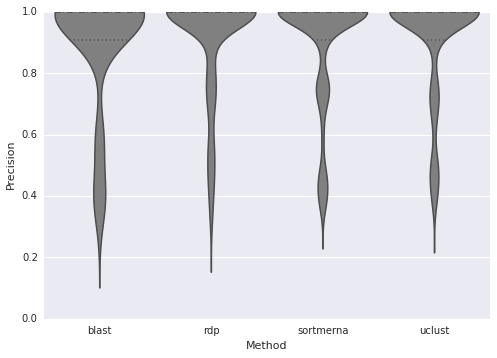

In [8]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Precision")

In [9]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Recall")

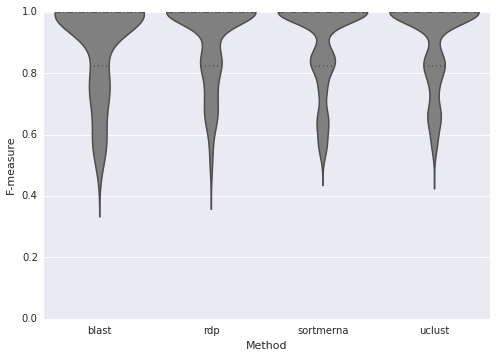

In [10]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="F-measure")

In [11]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Precision")

In [12]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Recall")

In [13]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


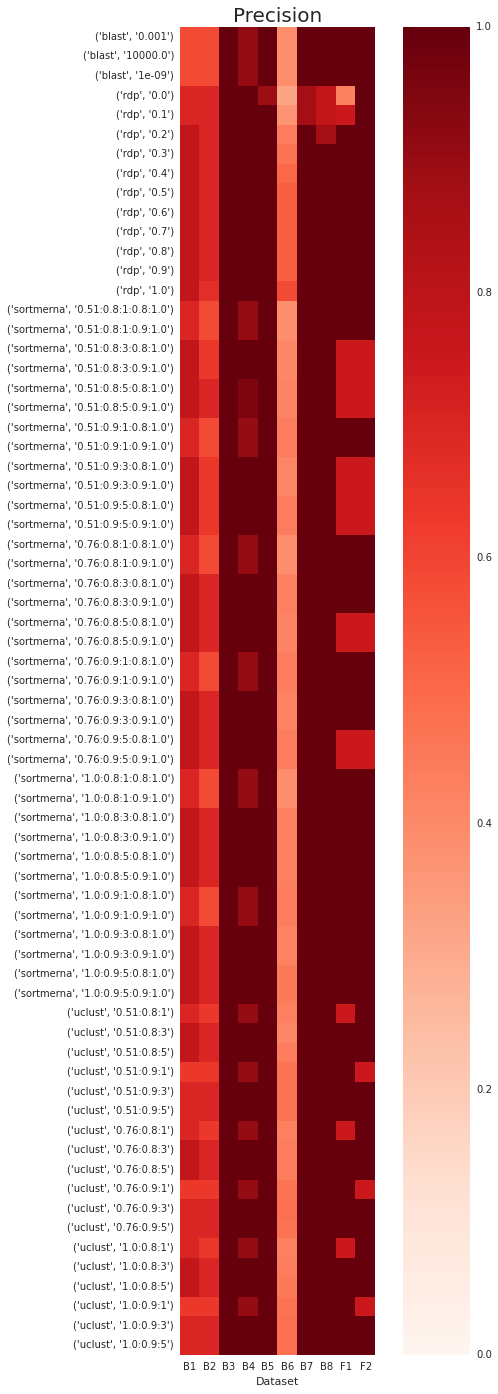

In [14]:
heatmap_from_data_frame(mock_results, "Precision")

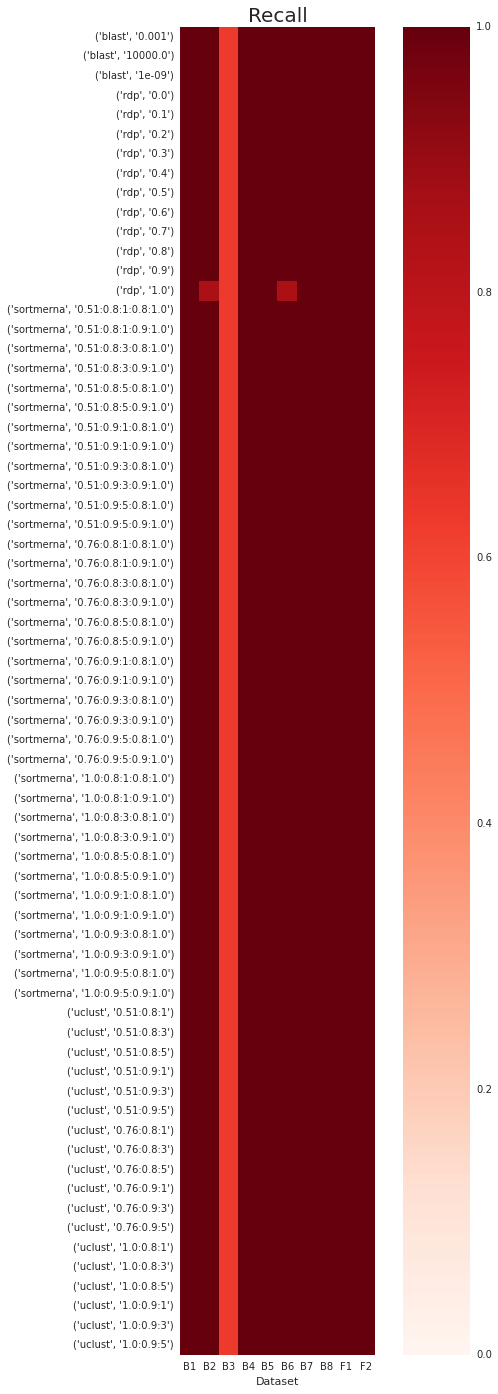

In [15]:
heatmap_from_data_frame(mock_results, "Recall")

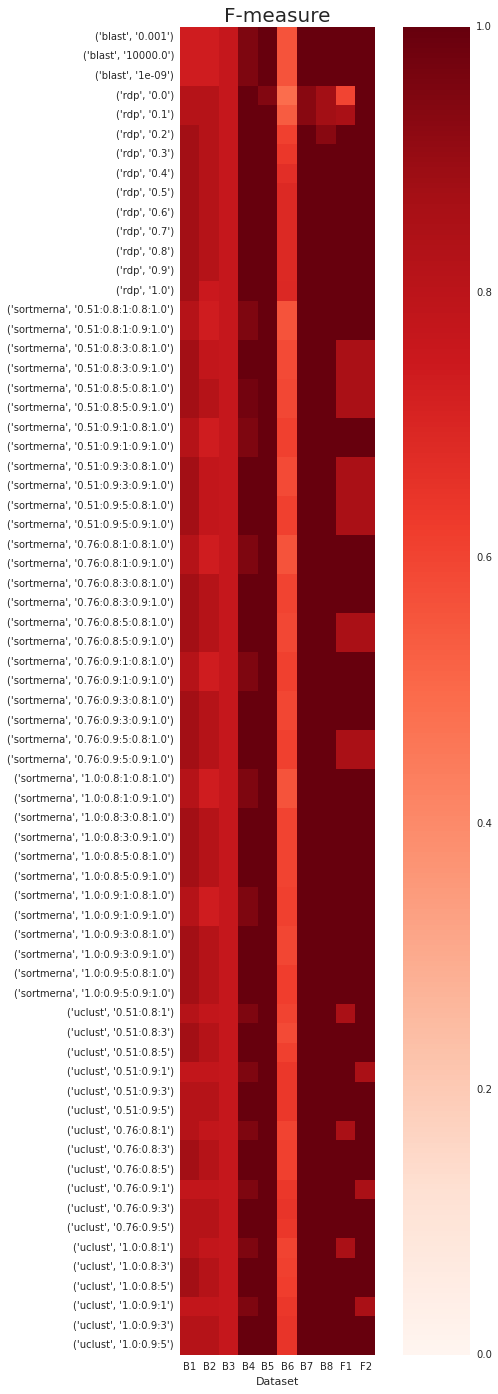

In [16]:
heatmap_from_data_frame(mock_results, "F-measure")

In [17]:
method_by_dataset_a1(mock_results, 'B1')

Method  Precision  Recall  F-measure
1904  sortmerna   0.777778       1   0.875000
1943        rdp   0.777778       1   0.875000
1961     uclust   0.777778       1   0.875000
1942      blast   0.583333       1   0.736842

In [18]:
method_by_dataset_a1(mock_results, 'B2')

Method  Precision  Recall  F-measure
0   sortmerna   0.700000       1   0.823529
39        rdp   0.700000       1   0.823529
50     uclust   0.700000       1   0.823529
38      blast   0.583333       1   0.736842

In [19]:
method_by_dataset_a1(mock_results, 'B3')

Method  Precision  Recall  F-measure
680  sortmerna          1     0.7   0.823529
824      blast          1     0.7   0.823529
836        rdp          1     0.7   0.823529
909     uclust          1     0.7   0.823529

In [20]:
method_by_dataset_a1(mock_results, 'B4')

Method  Precision  Recall  F-measure
1428  sortmerna   1.000000       1   1.000000
1590        rdp   1.000000       1   1.000000
1660     uclust   1.000000       1   1.000000
1581      blast   0.909091       1   0.952381

In [21]:
method_by_dataset_a1(mock_results, 'B5')

Method  Precision  Recall  F-measure
952   sortmerna          1       1          1
1140        rdp          1       1          1
1152     uclust          1       1          1
1103      blast          1       1          1

In [22]:
method_by_dataset_a1(mock_results, 'B6')

Method  Precision    Recall  F-measure
598        rdp   0.666667  0.857143   0.750000
627     uclust   0.538462  1.000000   0.700000
558  sortmerna   0.500000  1.000000   0.666667
591      blast   0.411765  1.000000   0.583333

In [23]:
method_by_dataset_a1(mock_results, 'B7')

Method  Precision  Recall  F-measure
68   sortmerna          1       1          1
192        rdp          1       1          1
218     uclust          1       1          1
176      blast          1       1          1

In [24]:
method_by_dataset_a1(mock_results, 'B8')

Method  Precision  Recall  F-measure
272  sortmerna          1       1          1
427     uclust          1       1          1
402        rdp          1       1          1
381      blast          1       1          1

In [25]:
method_by_dataset_a1(mock_results, 'F1')

Method  Precision  Recall  F-measure
1802  sortmerna          1       1          1
1833        rdp          1       1          1
1808      blast          1       1          1
1892     uclust          1       1          1

In [26]:
method_by_dataset_a1(mock_results, 'F2')

Method  Precision  Recall  F-measure
1326  sortmerna          1       1          1
1370        rdp          1       1          1
1333      blast          1       1          1
1403     uclust          1       1          1

Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

In [27]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Pearson r")

In [28]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Spearman r")

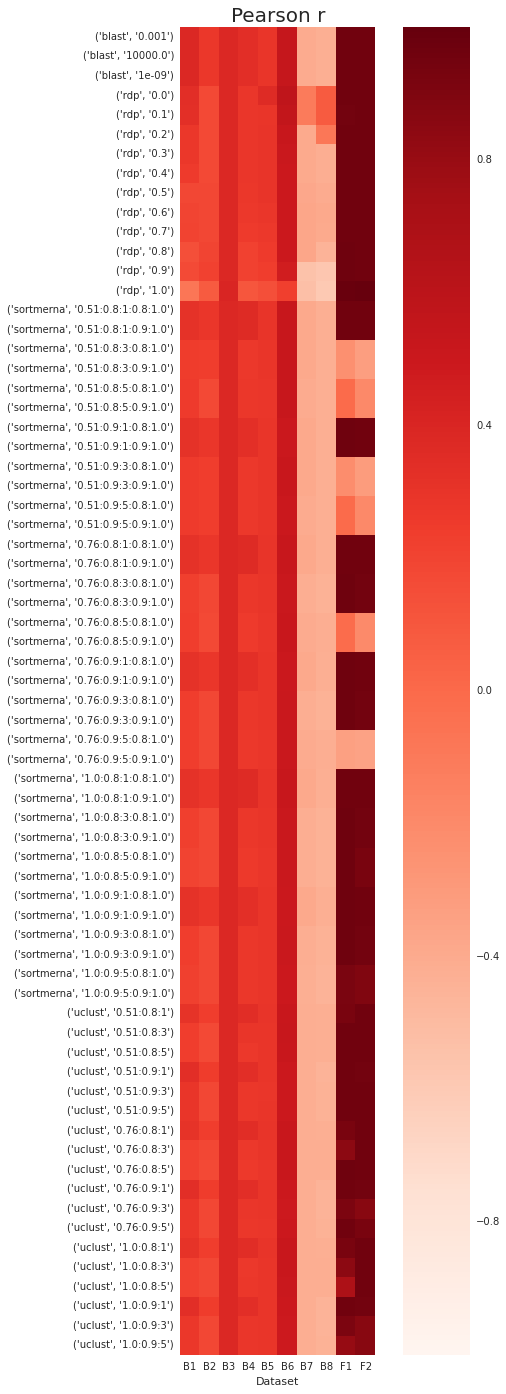

In [29]:
heatmap_from_data_frame(mock_results, "Pearson r", vmin=-1, vmax=1)

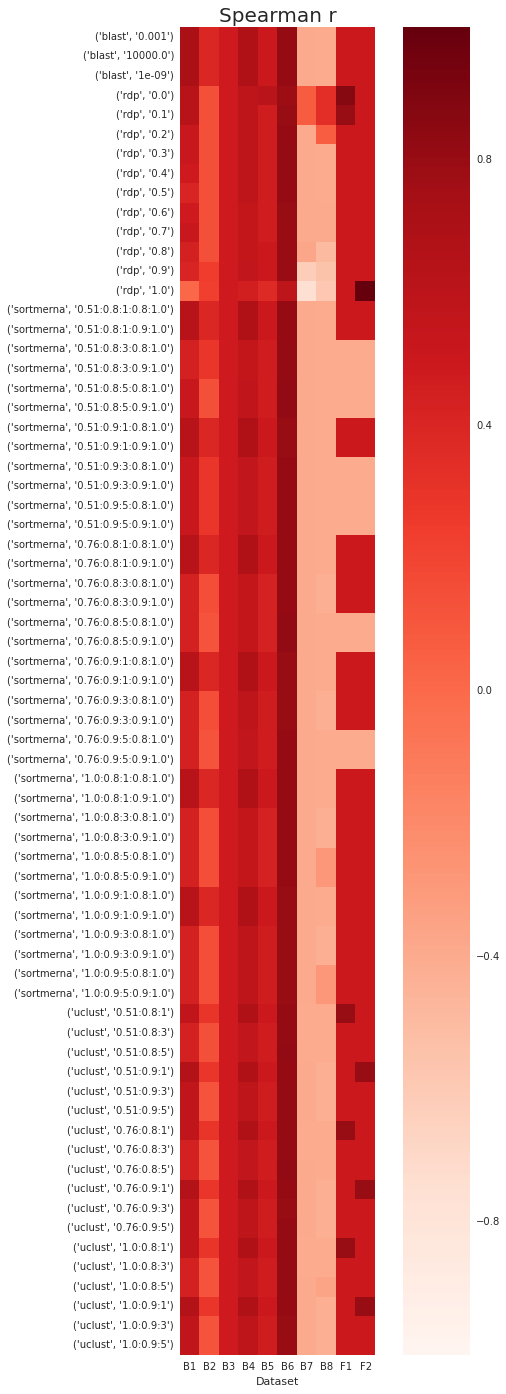

In [30]:
heatmap_from_data_frame(mock_results, "Spearman r", vmin=-1, vmax=1)

In [31]:
method_by_dataset_a2(mock_results, 'B1')

Method  Pearson r  Spearman r
1940      blast   0.385111    0.716015
1950        rdp   0.339062    0.627523
1956     uclust   0.338460    0.662330
1922  sortmerna   0.319719    0.627523

In [32]:
method_by_dataset_a2(mock_results, 'B2')

Method  Pearson r  Spearman r
25  sortmerna   0.285307    0.394539
36      blast   0.279775    0.394539
64     uclust   0.244916    0.281842
43        rdp   0.210988    0.242311

In [33]:
method_by_dataset_a2(mock_results, 'B3')

Method  Pearson r  Spearman r
841        rdp   0.546186     0.41518
893     uclust   0.512888     0.41518
681  sortmerna   0.512888     0.41518
833      blast   0.512888     0.41518

In [34]:
method_by_dataset_a2(mock_results, 'B4')

Method  Pearson r  Spearman r
1469  sortmerna   0.568484    0.764320
1677     uclust   0.537715    0.764320
1581      blast   0.536869    0.778050
1617        rdp   0.523439    0.758442

In [35]:
method_by_dataset_a2(mock_results, 'B5')

Method  Pearson r  Spearman r
1138        rdp   0.520135    0.739455
994   sortmerna   0.490375    0.758442
1202     uclust   0.488507    0.758442
1102      blast   0.483011    0.758442

In [36]:
method_by_dataset_a2(mock_results, 'B6')

Method  Pearson r  Spearman r
615        rdp   0.611207    0.795266
549  sortmerna   0.567344    0.852032
585      blast   0.563170    0.852555
666     uclust   0.562625    0.859502

In [37]:
method_by_dataset_a2(mock_results, 'B7')

Method  Pearson r  Spearman r
206        rdp   0.013133    0.190476
128  sortmerna  -0.249951   -0.214286
182      blast  -0.261933   -0.214286
239     uclust  -0.275654   -0.214286

In [38]:
method_by_dataset_a2(mock_results, 'B8')

Method  Pearson r  Spearman r
411        rdp   0.214662    0.426782
339  sortmerna  -0.289345   -0.214286
471     uclust  -0.290583   -0.214286
384      blast  -0.300706   -0.214286

In [39]:
method_by_dataset_a2(mock_results, 'F1')

Method  Pearson r  Spearman r
1846        rdp   0.989912         0.5
1900     uclust   0.989535         0.5
1741  sortmerna   0.989326         0.5
1816      blast   0.988999         0.5

In [40]:
method_by_dataset_a2(mock_results, 'F2')

Method  Pearson r  Spearman r
1345        rdp   0.999626         1.0
1378     uclust   0.969135         0.5
1264  sortmerna   0.968971         0.5
1333      blast   0.967533         0.5